In [1]:
import pandas as pd

## Get measurements from CSV

In [2]:
sensor_readings = pd.read_csv("D:\Master\Thesis\Code\L-Town\measurements_LTown.csv", index_col = 0)

sensor_readings['Timestamp'] = pd.to_datetime(sensor_readings['Timestamp'])

# Extract entity ID and type
sensor_readings['entity_id'] = sensor_readings['sensor_id'].apply(lambda x: "_".join(x.split("_")[:2]))  # e.g., Node_1 or Pipe_12
sensor_readings['measurement_type'] = sensor_readings['sensor_type']  # demand, pressure, flow
sensor_readings['entity_type'] = sensor_readings['entity_id'].apply(lambda x: x.split("_")[0])  # Node or Pipe


In [3]:
sensor_readings["measurement_type"].unique()

array(['demand', 'flow', 'level', 'pressure'], dtype=object)

In [4]:
sensor_readings

,Timestamp,sensor_id,measurement,sensor_type,unique_id,entity_id,measurement_type,entity_type
0,2018-01-01 00:00:00,n1_demand,41.801667,demand,n1_demand_2018-01-01 00:00:00,n1_demand,demand,n1
1,2018-01-01 00:30:00,n1_demand,37.711667,demand,n1_demand_2018-01-01 00:30:00,n1_demand,demand,n1
2,2018-01-01 01:00:00,n1_demand,37.425000,demand,n1_demand_2018-01-01 01:00:00,n1_demand,demand,n1
3,2018-01-01 01:30:00,n1_demand,41.076667,demand,n1_demand_2018-01-01 01:30:00,n1_demand,demand,n1
4,2018-01-01 02:00:00,n1_demand,39.751667,demand,n1_demand_2018-01-01 02:00:00,n1_demand,demand,n1
...,...,...,...,...,...,...,...,...
5326075,2018-12-31 23:35:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:35:00,n769_pressure,pressure,n769
5326076,2018-12-31 23:40:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:40:00,n769_pressure,pressure,n769
5326077,2018-12-31 23:45:00,n769_pressure,48.360000,pressure,n769_pressure_2018-12-31 23:45:00,n769_pressure,pressure,n769
5326078,2018-12-31 23:50:00,n769_pressure,48.320000,pressure,n769_pressure_2018-12-31 23:50:00,n769_pressure,pressure,n769


In [5]:
# Nodes → demand
demands_df = sensor_readings[sensor_readings['measurement_type'] == 'demand']
demands_all = demands_df.pivot_table(index='Timestamp', columns=['entity_type'], values='measurement')

In [6]:
demands_all

entity_type,n1,n10,n11,n13,n16,n17,n18,n19,n2,n20,...,n40,n41,n42,n43,n44,n45,n6,n7,n8,n9
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,41.801667,42.246667,252.763333,169.983333,61.173333,268.900000,46.381667,95.145000,112.651667,106.310000,...,210.528333,89.528333,133.441667,74.175000,25.051667,217.703333,177.465000,255.903333,231.466667,262.408333
2018-01-01 00:30:00,37.711667,42.080000,272.173333,101.300000,40.010000,204.651667,42.625000,75.115000,83.136667,66.536667,...,151.203333,83.045000,123.778333,51.951667,18.488333,136.255000,135.065000,210.073333,126.196667,212.028333
2018-01-01 01:00:00,37.425000,23.261667,189.163333,91.825000,36.916667,196.053333,23.851667,51.430000,46.375000,56.936667,...,126.426667,54.695000,81.520000,48.276667,10.311667,116.596667,129.391667,165.678333,116.610000,133.613333
2018-01-01 01:30:00,41.076667,22.885000,189.800000,43.513333,34.856667,145.695000,28.040000,32.316667,51.645000,44.796667,...,57.490000,42.215000,62.923333,33.740000,11.483333,91.736667,96.156667,120.151667,115.490000,92.256667
2018-01-01 02:00:00,39.751667,14.896667,126.500000,53.878333,34.081667,90.496667,13.090000,17.340000,40.926667,41.073333,...,91.510000,48.531667,72.335000,23.166667,9.100000,84.108333,59.726667,54.741667,76.676667,99.265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,214.273333,110.821667,514.861667,238.323333,87.590000,413.788333,62.458333,115.005000,130.740000,155.675000,...,294.626667,144.903333,215.978333,161.385000,29.076667,318.801667,273.091667,534.883333,394.745000,442.275000
2018-12-31 22:00:00,115.246667,105.376667,393.791667,217.011667,58.318333,468.473333,52.306667,97.768333,170.505000,108.668333,...,336.743333,111.061667,165.533333,93.121667,37.916667,222.533333,309.181667,431.168333,322.828333,519.708333
2018-12-31 22:30:00,100.130000,93.946667,463.678333,176.165000,115.300000,317.785000,57.188333,92.020000,215.485000,142.785000,...,350.755000,149.801667,223.280000,145.436667,47.916667,292.401667,209.728333,262.151667,309.735000,506.728333


### Separate data by feature

## Imputation

### Split train/val, and scale

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

### Select semantically relevant pipes

In [10]:
demands_c0 = demands_all[['n1', 'n10', 'n16', 'n19', 'n2', 'n22', 'n29', 'n3', 'n32', 'n345', 'n346', 'n347', 'n349', 'n350', 'n352', 'n354', 'n357', 'n362', 'n368', 'n371', 'n374', 'n375', 'n376', 'n378', 'n379', 'n382', 'n383', 'n384', 'n41']]
demands_c1 = demands_all[["n11", "n13", "n17", "n355", "n360", "n386", "n388", "n40", "n42", "n45", "n8"]]
demands_c2 = demands_all[['n30', 'n344', 'n351', 'n353', 'n358', 'n36', 'n381', 'n6', 'n7', 'n9']]
demands_c3 = demands_all[["n18", "n20", "n21", "n23", "n24", "n25", "n26", "n27", "n28", "n31", "n33", "n34", "n343", "n35", "n356", "n361", "n364", "n365", "n366", "n367", "n369", "n370", "n372", "n373", "n377", "n385", "n387", "n389", "n39", "n4", "n43", "n44"]]


# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [demands_c0, demands_c1, demands_c2, demands_c3, demands_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "demand", i)


In [11]:
X_train_full_unscaled[1]

entity_type,n11,n13,n17,n355,n360,n386,n388,n40,n42,n45,n8
Timestamp,,,,,,,,,,,
2018-01-01 00:00:00,252.763333,169.983333,268.900000,144.061667,163.010000,178.736667,307.150000,210.528333,133.441667,217.703333,231.466667
2018-01-01 00:30:00,272.173333,101.300000,204.651667,233.173333,117.076667,115.551667,252.593333,151.203333,123.778333,136.255000,126.196667
2018-01-01 01:00:00,189.163333,91.825000,196.053333,182.311667,97.891667,79.065000,205.691667,126.426667,81.520000,116.596667,116.610000
2018-01-01 01:30:00,189.800000,43.513333,145.695000,106.415000,44.513333,107.911667,157.490000,57.490000,62.923333,91.736667,115.490000
2018-01-01 02:00:00,126.500000,53.878333,90.496667,76.330000,70.858333,92.508333,108.628333,91.510000,72.335000,84.108333,76.676667
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-19 21:30:00,567.195000,266.296667,430.823333,515.263333,244.650000,288.431667,443.606667,315.965000,347.305000,186.545000,138.800000
2018-10-19 22:00:00,475.620000,211.653333,432.701667,401.605000,242.830000,307.023333,471.475000,313.611667,260.241667,177.061667,223.646667
2018-10-19 22:30:00,391.000000,170.551667,308.111667,219.138333,248.690000,263.465000,394.298333,321.186667,179.930000,183.028333,252.631667


In [12]:
def sliding_window_3d(data, window_size, stride):
    """
    Converts a long time series [1, T, F] into [N, window_size, F]
    """
    data = data.squeeze(0)  # [T, F]
    total_steps, n_features = data.shape
    windows = []

    for i in range(0, total_steps - window_size + 1, stride):
        window = data[i:i+window_size]
        windows.append(window)

    return np.stack(windows)

### Introduce MCAR Missingness

In [13]:
from pygrinder import mcar

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}
X_train_seq = {}
X_val_seq = {}
train_masks_seq = {}
val_masks_seq = {}

# Full tensors for each cluster
X_train_full_tensor = {}
X_val_full_tensor = {}
X_val_full_seq = {}
X_train_full_seq = {}
X_train_full_unscaled_seq_tensor = {}
X_val_full_unscaled_seq_tensor = {}

# Define sliding window parameters
n_steps = 168 # 3.5 days each window
stride = 48 # 1 day stride

for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}
    X_train_seq[cluster_id] = {}
    X_val_seq[cluster_id] = {}
    train_masks_seq[cluster_id] = {}
    val_masks_seq[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mcar(X_train_full_scaled[cluster_id].values, p=rate)
        X_val_incomplete[cluster_id][key] = mcar(X_val_full_scaled[cluster_id].values, p=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

        # Expand dims for batch axis (needed for sliding window)
        X_train_tensor = np.expand_dims(X_train_incomplete[cluster_id][key], axis=0)
        X_val_tensor = np.expand_dims(X_val_incomplete[cluster_id][key], axis=0)
        train_mask_tensor = np.expand_dims(train_masks[cluster_id][key], axis=0)
        val_mask_tensor = np.expand_dims(val_masks[cluster_id][key], axis=0)

        # Sliding window on data
        X_train_seq[cluster_id][key] = sliding_window_3d(X_train_tensor, window_size=n_steps, stride=stride)
        X_val_seq[cluster_id][key] = sliding_window_3d(X_val_tensor, window_size=n_steps, stride=stride)

        # Sliding window on masks
        train_masks_seq[cluster_id][key] = sliding_window_3d(train_mask_tensor, window_size=n_steps, stride=stride)
        val_masks_seq[cluster_id][key] = sliding_window_3d(val_mask_tensor, window_size=n_steps, stride=stride)


    # Expand full training tensors
    X_train_full_tensor[cluster_id] = np.expand_dims(X_train_full_scaled[cluster_id].values, axis = 0)

    # Expand full validation tensors
    X_val_full_tensor[cluster_id] = np.expand_dims(X_val_full_scaled[cluster_id].values, axis = 0)

    # Convert scaled data to tensor
    X_val_full_seq[cluster_id] = sliding_window_3d(X_val_full_tensor[cluster_id], window_size=n_steps, stride=stride)
    X_train_full_seq[cluster_id] = sliding_window_3d(X_train_full_tensor[cluster_id], window_size=n_steps, stride=stride)

    # Convert unscaled data to tensor
    X_train_full_unscaled_values = np.expand_dims(X_train_full_unscaled[cluster_id].values, axis=0)
    X_train_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_train_full_unscaled_values, window_size=n_steps, stride=stride)

    X_val_full_unscaled_values = np.expand_dims(X_val_full_unscaled[cluster_id].values, axis=0)
    X_val_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_val_full_unscaled_values, window_size=n_steps, stride=stride)

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90
Introducing 5.0% missingness for cluster 4 with key 5
Introducing 20.0% missingness for cluster 4 with key 20
In

In [14]:
# Step 3: Prepare the final datasets with 'X' (incomplete) and 'X_ori' (full data)

# 20 percent missing
train_data, val_data = {}, {}

for cluster_id in range(len(clusters)):
    train_data[cluster_id] = {}
    val_data[cluster_id] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        
        # Prepare the train and validation data dictionaries for each missing rate
        train_data[cluster_id][key] = {"X": X_train_seq[cluster_id][key]}
        val_data[cluster_id][key] = {"X": X_val_seq[cluster_id][key], "X_ori": X_val_full_seq[cluster_id]}

## BRITS IMputation

In [20]:
from pypots.imputation import BRITS
from pypots.nn.modules.loss import MAE, MSE
from pypots.optim.adam import Adam
import torch

def intialize_BRITS(n_steps, num_features, rnn_hidden_size):

    # Basic configuration
    model = BRITS(
        n_steps=n_steps,
        n_features=num_features,
        rnn_hidden_size=rnn_hidden_size,               # Reasonable hidden size
        batch_size=32,                    # Standard for most datasets
        epochs=25,                       # Higher epochs for better convergence
        patience=5,                      # Early stopping if no improvement
        training_loss=MAE,                # MAE often performs well for imputation
        validation_metric=MSE,           # Use MSE for validation comparison
        optimizer=Adam,                   # Adam optimizer (default)
        num_workers=0,                    # Adjust if using DataLoader with multiprocessing
        device="cuda" if torch.cuda.is_available() else "cpu",  # Use GPU if available
        saving_path="./brits_model",     # Directory to save model checkpoints
        model_saving_strategy="best",    # Save best model only
        verbose=True                      # Print training progress
    )

    return model

d:\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [21]:
models = {}
rnn_hidden = 0
# Initialize and fit BRITS models for each missing rate

for cluster_id in range(len(clusters)):
    print(f"Training BRITS models for cluster {cluster_id}...")
    models[cluster_id] = {}
    for rate in missing_rates:
        print(f"Training model for missing rate {rate} in cluster {cluster_id}...")
        key = int(rate * 100)

        _, n_steps, n_features = train_data[cluster_id][key]["X"].shape
        
        # Reduce complexity of model for less features
        if cluster_id != len(clusters) - 1:
            rnn_hidden = 16
        else:
            rnn_hidden = 32
        
        models[cluster_id][key] = intialize_BRITS(n_steps, n_features, rnn_hidden)
        models[cluster_id][key].fit(train_data[cluster_id][key], val_set=val_data[cluster_id][key])

2025-06-24 19:27:56 [INFO]: Using the given device: cpu
2025-06-24 19:27:56 [INFO]: Model files will be saved to ./brits_model\20250624_T192756
2025-06-24 19:27:56 [INFO]: Tensorboard file will be saved to ./brits_model\20250624_T192756\tensorboard
2025-06-24 19:27:56 [INFO]: Using customized MAE as the training loss function.
2025-06-24 19:27:56 [INFO]: Using customized MSE as the validation metric function.
2025-06-24 19:27:56 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 18,576


Training BRITS models for cluster 0...
Training model for missing rate 0.05 in cluster 0...


2025-06-24 19:28:07 [INFO]: Epoch 001 - training loss (MAE): 1.6942, validation MSE: 0.7016
2025-06-24 19:28:15 [INFO]: Epoch 002 - training loss (MAE): 1.4593, validation MSE: 0.4996
2025-06-24 19:28:22 [INFO]: Epoch 003 - training loss (MAE): 1.2661, validation MSE: 0.3653
2025-06-24 19:28:30 [INFO]: Epoch 004 - training loss (MAE): 1.1310, validation MSE: 0.2885
2025-06-24 19:28:38 [INFO]: Epoch 005 - training loss (MAE): 1.0139, validation MSE: 0.2514
2025-06-24 19:28:45 [INFO]: Epoch 006 - training loss (MAE): 0.9320, validation MSE: 0.2366
2025-06-24 19:28:52 [INFO]: Epoch 007 - training loss (MAE): 0.8919, validation MSE: 0.2295
2025-06-24 19:28:59 [INFO]: Epoch 008 - training loss (MAE): 0.8390, validation MSE: 0.2260
2025-06-24 19:29:07 [INFO]: Epoch 009 - training loss (MAE): 0.8062, validation MSE: 0.2235
2025-06-24 19:29:14 [INFO]: Epoch 010 - training loss (MAE): 0.7978, validation MSE: 0.2210
2025-06-24 19:29:21 [INFO]: Epoch 011 - training loss (MAE): 0.7617, validation 

Training model for missing rate 0.2 in cluster 0...


2025-06-24 19:31:23 [INFO]: Epoch 001 - training loss (MAE): 1.7839, validation MSE: 0.8286
2025-06-24 19:31:32 [INFO]: Epoch 002 - training loss (MAE): 1.5968, validation MSE: 0.6391
2025-06-24 19:31:41 [INFO]: Epoch 003 - training loss (MAE): 1.4330, validation MSE: 0.4753
2025-06-24 19:31:50 [INFO]: Epoch 004 - training loss (MAE): 1.2825, validation MSE: 0.3549
2025-06-24 19:31:58 [INFO]: Epoch 005 - training loss (MAE): 1.1631, validation MSE: 0.2833
2025-06-24 19:32:07 [INFO]: Epoch 006 - training loss (MAE): 1.0377, validation MSE: 0.2465
2025-06-24 19:32:15 [INFO]: Epoch 007 - training loss (MAE): 0.9529, validation MSE: 0.2295
2025-06-24 19:32:23 [INFO]: Epoch 008 - training loss (MAE): 0.9040, validation MSE: 0.2209
2025-06-24 19:32:32 [INFO]: Epoch 009 - training loss (MAE): 0.8636, validation MSE: 0.2154
2025-06-24 19:32:40 [INFO]: Epoch 010 - training loss (MAE): 0.8254, validation MSE: 0.2108
2025-06-24 19:32:49 [INFO]: Epoch 011 - training loss (MAE): 0.7984, validation 

Training model for missing rate 0.6 in cluster 0...


2025-06-24 19:35:06 [INFO]: Epoch 001 - training loss (MAE): 1.7158, validation MSE: 0.8351
2025-06-24 19:35:15 [INFO]: Epoch 002 - training loss (MAE): 1.5997, validation MSE: 0.7040
2025-06-24 19:35:23 [INFO]: Epoch 003 - training loss (MAE): 1.4810, validation MSE: 0.5553
2025-06-24 19:35:32 [INFO]: Epoch 004 - training loss (MAE): 1.3429, validation MSE: 0.4185
2025-06-24 19:35:40 [INFO]: Epoch 005 - training loss (MAE): 1.2359, validation MSE: 0.3217
2025-06-24 19:35:49 [INFO]: Epoch 006 - training loss (MAE): 1.1244, validation MSE: 0.2647
2025-06-24 19:35:58 [INFO]: Epoch 007 - training loss (MAE): 1.0492, validation MSE: 0.2374
2025-06-24 19:36:06 [INFO]: Epoch 008 - training loss (MAE): 0.9833, validation MSE: 0.2246
2025-06-24 19:36:16 [INFO]: Epoch 009 - training loss (MAE): 0.9459, validation MSE: 0.2187
2025-06-24 19:36:24 [INFO]: Epoch 010 - training loss (MAE): 0.9093, validation MSE: 0.2154
2025-06-24 19:36:33 [INFO]: Epoch 011 - training loss (MAE): 0.8608, validation 

Training model for missing rate 0.9 in cluster 0...


2025-06-24 19:38:47 [INFO]: Epoch 001 - training loss (MAE): 1.7522, validation MSE: 0.9177
2025-06-24 19:38:55 [INFO]: Epoch 002 - training loss (MAE): 1.6843, validation MSE: 0.8917
2025-06-24 19:39:04 [INFO]: Epoch 003 - training loss (MAE): 1.6501, validation MSE: 0.8486
2025-06-24 19:39:12 [INFO]: Epoch 004 - training loss (MAE): 1.6006, validation MSE: 0.7723
2025-06-24 19:39:21 [INFO]: Epoch 005 - training loss (MAE): 1.5223, validation MSE: 0.6686
2025-06-24 19:39:30 [INFO]: Epoch 006 - training loss (MAE): 1.4501, validation MSE: 0.5695
2025-06-24 19:39:39 [INFO]: Epoch 007 - training loss (MAE): 1.3949, validation MSE: 0.4586
2025-06-24 19:39:47 [INFO]: Epoch 008 - training loss (MAE): 1.2886, validation MSE: 0.3577
2025-06-24 19:39:56 [INFO]: Epoch 009 - training loss (MAE): 1.1794, validation MSE: 0.2854
2025-06-24 19:40:05 [INFO]: Epoch 010 - training loss (MAE): 1.1204, validation MSE: 0.2639
2025-06-24 19:40:14 [INFO]: Epoch 011 - training loss (MAE): 1.1054, validation 

Training BRITS models for cluster 1...
Training model for missing rate 0.05 in cluster 1...


2025-06-24 19:42:27 [INFO]: Epoch 001 - training loss (MAE): 1.6811, validation MSE: 0.7696
2025-06-24 19:42:36 [INFO]: Epoch 002 - training loss (MAE): 1.5887, validation MSE: 0.6576
2025-06-24 19:42:45 [INFO]: Epoch 003 - training loss (MAE): 1.5100, validation MSE: 0.5504
2025-06-24 19:42:53 [INFO]: Epoch 004 - training loss (MAE): 1.3847, validation MSE: 0.4529
2025-06-24 19:43:02 [INFO]: Epoch 005 - training loss (MAE): 1.2807, validation MSE: 0.3687
2025-06-24 19:43:11 [INFO]: Epoch 006 - training loss (MAE): 1.1816, validation MSE: 0.3004
2025-06-24 19:43:20 [INFO]: Epoch 007 - training loss (MAE): 1.0851, validation MSE: 0.2470
2025-06-24 19:43:28 [INFO]: Epoch 008 - training loss (MAE): 1.0078, validation MSE: 0.2078
2025-06-24 19:43:37 [INFO]: Epoch 009 - training loss (MAE): 0.9399, validation MSE: 0.1829
2025-06-24 19:43:45 [INFO]: Epoch 010 - training loss (MAE): 0.8665, validation MSE: 0.1690
2025-06-24 19:43:54 [INFO]: Epoch 011 - training loss (MAE): 0.8125, validation 

Training model for missing rate 0.2 in cluster 1...


2025-06-24 19:46:09 [INFO]: Epoch 001 - training loss (MAE): 1.6697, validation MSE: 0.7759
2025-06-24 19:46:17 [INFO]: Epoch 002 - training loss (MAE): 1.5777, validation MSE: 0.6653
2025-06-24 19:46:27 [INFO]: Epoch 003 - training loss (MAE): 1.4869, validation MSE: 0.5569
2025-06-24 19:46:35 [INFO]: Epoch 004 - training loss (MAE): 1.3719, validation MSE: 0.4546
2025-06-24 19:46:44 [INFO]: Epoch 005 - training loss (MAE): 1.2713, validation MSE: 0.3682
2025-06-24 19:46:53 [INFO]: Epoch 006 - training loss (MAE): 1.1884, validation MSE: 0.3028
2025-06-24 19:47:01 [INFO]: Epoch 007 - training loss (MAE): 1.1038, validation MSE: 0.2542
2025-06-24 19:47:09 [INFO]: Epoch 008 - training loss (MAE): 1.0020, validation MSE: 0.2205
2025-06-24 19:47:18 [INFO]: Epoch 009 - training loss (MAE): 0.9293, validation MSE: 0.1988
2025-06-24 19:47:26 [INFO]: Epoch 010 - training loss (MAE): 0.8816, validation MSE: 0.1842
2025-06-24 19:47:35 [INFO]: Epoch 011 - training loss (MAE): 0.8329, validation 

Training model for missing rate 0.6 in cluster 1...


2025-06-24 19:49:49 [INFO]: Epoch 001 - training loss (MAE): 1.7462, validation MSE: 0.8644
2025-06-24 19:49:57 [INFO]: Epoch 002 - training loss (MAE): 1.6887, validation MSE: 0.8025
2025-06-24 19:50:06 [INFO]: Epoch 003 - training loss (MAE): 1.6243, validation MSE: 0.7303
2025-06-24 19:50:15 [INFO]: Epoch 004 - training loss (MAE): 1.5540, validation MSE: 0.6424
2025-06-24 19:50:24 [INFO]: Epoch 005 - training loss (MAE): 1.4724, validation MSE: 0.5430
2025-06-24 19:50:33 [INFO]: Epoch 006 - training loss (MAE): 1.3551, validation MSE: 0.4456
2025-06-24 19:50:42 [INFO]: Epoch 007 - training loss (MAE): 1.2823, validation MSE: 0.3646
2025-06-24 19:50:50 [INFO]: Epoch 008 - training loss (MAE): 1.2121, validation MSE: 0.3012
2025-06-24 19:50:59 [INFO]: Epoch 009 - training loss (MAE): 1.1096, validation MSE: 0.2544
2025-06-24 19:51:07 [INFO]: Epoch 010 - training loss (MAE): 1.0422, validation MSE: 0.2202
2025-06-24 19:51:16 [INFO]: Epoch 011 - training loss (MAE): 0.9654, validation 

Training model for missing rate 0.9 in cluster 1...


2025-06-24 19:53:32 [INFO]: Epoch 001 - training loss (MAE): 1.6843, validation MSE: 0.9453
2025-06-24 19:53:41 [INFO]: Epoch 002 - training loss (MAE): 1.6774, validation MSE: 0.9327
2025-06-24 19:53:52 [INFO]: Epoch 003 - training loss (MAE): 1.6452, validation MSE: 0.9175
2025-06-24 19:54:00 [INFO]: Epoch 004 - training loss (MAE): 1.6473, validation MSE: 0.8952
2025-06-24 19:54:09 [INFO]: Epoch 005 - training loss (MAE): 1.6068, validation MSE: 0.8629
2025-06-24 19:54:17 [INFO]: Epoch 006 - training loss (MAE): 1.5696, validation MSE: 0.7986
2025-06-24 19:54:25 [INFO]: Epoch 007 - training loss (MAE): 1.5220, validation MSE: 0.7158
2025-06-24 19:54:33 [INFO]: Epoch 008 - training loss (MAE): 1.4799, validation MSE: 0.6540
2025-06-24 19:54:41 [INFO]: Epoch 009 - training loss (MAE): 1.4094, validation MSE: 0.5698
2025-06-24 19:54:50 [INFO]: Epoch 010 - training loss (MAE): 1.3369, validation MSE: 0.4775
2025-06-24 19:54:58 [INFO]: Epoch 011 - training loss (MAE): 1.2327, validation 

Training BRITS models for cluster 2...
Training model for missing rate 0.05 in cluster 2...


2025-06-24 19:57:21 [INFO]: Epoch 001 - training loss (MAE): 1.7002, validation MSE: 0.7603
2025-06-24 19:57:31 [INFO]: Epoch 002 - training loss (MAE): 1.6140, validation MSE: 0.6568
2025-06-24 19:57:40 [INFO]: Epoch 003 - training loss (MAE): 1.5167, validation MSE: 0.5581
2025-06-24 19:57:50 [INFO]: Epoch 004 - training loss (MAE): 1.4437, validation MSE: 0.4639
2025-06-24 19:57:59 [INFO]: Epoch 005 - training loss (MAE): 1.3233, validation MSE: 0.3781
2025-06-24 19:58:09 [INFO]: Epoch 006 - training loss (MAE): 1.2291, validation MSE: 0.3078
2025-06-24 19:58:18 [INFO]: Epoch 007 - training loss (MAE): 1.1283, validation MSE: 0.2543
2025-06-24 19:58:28 [INFO]: Epoch 008 - training loss (MAE): 1.0476, validation MSE: 0.2191
2025-06-24 19:58:37 [INFO]: Epoch 009 - training loss (MAE): 0.9606, validation MSE: 0.1970
2025-06-24 19:58:47 [INFO]: Epoch 010 - training loss (MAE): 0.9077, validation MSE: 0.1844
2025-06-24 19:58:56 [INFO]: Epoch 011 - training loss (MAE): 0.8559, validation 

Training model for missing rate 0.2 in cluster 2...


2025-06-24 20:01:22 [INFO]: Epoch 001 - training loss (MAE): 1.9055, validation MSE: 1.0325
2025-06-24 20:01:32 [INFO]: Epoch 002 - training loss (MAE): 1.7973, validation MSE: 0.9038
2025-06-24 20:01:43 [INFO]: Epoch 003 - training loss (MAE): 1.6914, validation MSE: 0.7645
2025-06-24 20:01:52 [INFO]: Epoch 004 - training loss (MAE): 1.5715, validation MSE: 0.6192
2025-06-24 20:01:59 [INFO]: Epoch 005 - training loss (MAE): 1.4733, validation MSE: 0.4873
2025-06-24 20:02:06 [INFO]: Epoch 006 - training loss (MAE): 1.3355, validation MSE: 0.3812
2025-06-24 20:02:13 [INFO]: Epoch 007 - training loss (MAE): 1.2224, validation MSE: 0.3028
2025-06-24 20:02:20 [INFO]: Epoch 008 - training loss (MAE): 1.1311, validation MSE: 0.2494
2025-06-24 20:02:26 [INFO]: Epoch 009 - training loss (MAE): 1.0782, validation MSE: 0.2155
2025-06-24 20:02:34 [INFO]: Epoch 010 - training loss (MAE): 1.0052, validation MSE: 0.1957
2025-06-24 20:02:44 [INFO]: Epoch 011 - training loss (MAE): 0.9335, validation 

Training model for missing rate 0.6 in cluster 2...


2025-06-24 20:05:16 [INFO]: Epoch 001 - training loss (MAE): 1.8030, validation MSE: 0.9227
2025-06-24 20:05:26 [INFO]: Epoch 002 - training loss (MAE): 1.7306, validation MSE: 0.8681
2025-06-24 20:05:36 [INFO]: Epoch 003 - training loss (MAE): 1.6878, validation MSE: 0.8007
2025-06-24 20:05:46 [INFO]: Epoch 004 - training loss (MAE): 1.6345, validation MSE: 0.7137
2025-06-24 20:05:56 [INFO]: Epoch 005 - training loss (MAE): 1.5402, validation MSE: 0.6110
2025-06-24 20:06:07 [INFO]: Epoch 006 - training loss (MAE): 1.4532, validation MSE: 0.5045
2025-06-24 20:06:17 [INFO]: Epoch 007 - training loss (MAE): 1.3392, validation MSE: 0.4093
2025-06-24 20:06:27 [INFO]: Epoch 008 - training loss (MAE): 1.2357, validation MSE: 0.3279
2025-06-24 20:06:37 [INFO]: Epoch 009 - training loss (MAE): 1.1353, validation MSE: 0.2658
2025-06-24 20:06:46 [INFO]: Epoch 010 - training loss (MAE): 1.0534, validation MSE: 0.2242
2025-06-24 20:06:57 [INFO]: Epoch 011 - training loss (MAE): 0.9835, validation 

Training model for missing rate 0.9 in cluster 2...


2025-06-24 20:09:28 [INFO]: Epoch 001 - training loss (MAE): 1.6980, validation MSE: 0.9294
2025-06-24 20:09:36 [INFO]: Epoch 002 - training loss (MAE): 1.6779, validation MSE: 0.9196
2025-06-24 20:09:45 [INFO]: Epoch 003 - training loss (MAE): 1.6701, validation MSE: 0.9079
2025-06-24 20:09:54 [INFO]: Epoch 004 - training loss (MAE): 1.6778, validation MSE: 0.8921
2025-06-24 20:10:02 [INFO]: Epoch 005 - training loss (MAE): 1.6425, validation MSE: 0.8689
2025-06-24 20:10:11 [INFO]: Epoch 006 - training loss (MAE): 1.5858, validation MSE: 0.8281
2025-06-24 20:10:20 [INFO]: Epoch 007 - training loss (MAE): 1.5475, validation MSE: 0.7527
2025-06-24 20:10:29 [INFO]: Epoch 008 - training loss (MAE): 1.5228, validation MSE: 0.6949
2025-06-24 20:10:37 [INFO]: Epoch 009 - training loss (MAE): 1.4783, validation MSE: 0.6417
2025-06-24 20:10:46 [INFO]: Epoch 010 - training loss (MAE): 1.4172, validation MSE: 0.5781
2025-06-24 20:10:54 [INFO]: Epoch 011 - training loss (MAE): 1.3601, validation 

Training BRITS models for cluster 3...
Training model for missing rate 0.05 in cluster 3...


2025-06-24 20:13:13 [INFO]: Epoch 001 - training loss (MAE): 1.6637, validation MSE: 0.7427
2025-06-24 20:13:22 [INFO]: Epoch 002 - training loss (MAE): 1.4753, validation MSE: 0.5485
2025-06-24 20:13:31 [INFO]: Epoch 003 - training loss (MAE): 1.2898, validation MSE: 0.4120
2025-06-24 20:13:40 [INFO]: Epoch 004 - training loss (MAE): 1.1879, validation MSE: 0.3396
2025-06-24 20:13:49 [INFO]: Epoch 005 - training loss (MAE): 1.0751, validation MSE: 0.3096
2025-06-24 20:13:58 [INFO]: Epoch 006 - training loss (MAE): 1.0190, validation MSE: 0.2979
2025-06-24 20:14:07 [INFO]: Epoch 007 - training loss (MAE): 0.9737, validation MSE: 0.2899
2025-06-24 20:14:16 [INFO]: Epoch 008 - training loss (MAE): 0.9338, validation MSE: 0.2835
2025-06-24 20:14:25 [INFO]: Epoch 009 - training loss (MAE): 0.9068, validation MSE: 0.2785
2025-06-24 20:14:34 [INFO]: Epoch 010 - training loss (MAE): 0.8691, validation MSE: 0.2741
2025-06-24 20:14:43 [INFO]: Epoch 011 - training loss (MAE): 0.8626, validation 

Training model for missing rate 0.2 in cluster 3...


2025-06-24 20:17:02 [INFO]: Epoch 001 - training loss (MAE): 1.6943, validation MSE: 0.7598
2025-06-24 20:17:11 [INFO]: Epoch 002 - training loss (MAE): 1.5136, validation MSE: 0.5845
2025-06-24 20:17:20 [INFO]: Epoch 003 - training loss (MAE): 1.3698, validation MSE: 0.4497
2025-06-24 20:17:29 [INFO]: Epoch 004 - training loss (MAE): 1.2348, validation MSE: 0.3635
2025-06-24 20:17:38 [INFO]: Epoch 005 - training loss (MAE): 1.1397, validation MSE: 0.3199
2025-06-24 20:17:47 [INFO]: Epoch 006 - training loss (MAE): 1.0524, validation MSE: 0.2978
2025-06-24 20:17:56 [INFO]: Epoch 007 - training loss (MAE): 0.9811, validation MSE: 0.2858
2025-06-24 20:18:05 [INFO]: Epoch 008 - training loss (MAE): 0.9390, validation MSE: 0.2802
2025-06-24 20:18:14 [INFO]: Epoch 009 - training loss (MAE): 0.9027, validation MSE: 0.2765
2025-06-24 20:18:24 [INFO]: Epoch 010 - training loss (MAE): 0.8918, validation MSE: 0.2729
2025-06-24 20:18:33 [INFO]: Epoch 011 - training loss (MAE): 0.8710, validation 

Training model for missing rate 0.6 in cluster 3...


2025-06-24 20:20:59 [INFO]: Epoch 001 - training loss (MAE): 1.7230, validation MSE: 0.8748
2025-06-24 20:21:08 [INFO]: Epoch 002 - training loss (MAE): 1.6292, validation MSE: 0.7617
2025-06-24 20:21:17 [INFO]: Epoch 003 - training loss (MAE): 1.5252, validation MSE: 0.6269
2025-06-24 20:21:26 [INFO]: Epoch 004 - training loss (MAE): 1.4091, validation MSE: 0.4873
2025-06-24 20:21:35 [INFO]: Epoch 005 - training loss (MAE): 1.2786, validation MSE: 0.3826
2025-06-24 20:21:45 [INFO]: Epoch 006 - training loss (MAE): 1.1699, validation MSE: 0.3298
2025-06-24 20:21:53 [INFO]: Epoch 007 - training loss (MAE): 1.0867, validation MSE: 0.3059
2025-06-24 20:22:01 [INFO]: Epoch 008 - training loss (MAE): 1.0275, validation MSE: 0.2920
2025-06-24 20:22:08 [INFO]: Epoch 009 - training loss (MAE): 0.9883, validation MSE: 0.2830
2025-06-24 20:22:15 [INFO]: Epoch 010 - training loss (MAE): 0.9516, validation MSE: 0.2769
2025-06-24 20:22:22 [INFO]: Epoch 011 - training loss (MAE): 0.9126, validation 

Training model for missing rate 0.9 in cluster 3...


2025-06-24 20:24:18 [INFO]: Epoch 001 - training loss (MAE): 1.7135, validation MSE: 0.9187
2025-06-24 20:24:25 [INFO]: Epoch 002 - training loss (MAE): 1.6646, validation MSE: 0.8857
2025-06-24 20:24:33 [INFO]: Epoch 003 - training loss (MAE): 1.6278, validation MSE: 0.8297
2025-06-24 20:24:40 [INFO]: Epoch 004 - training loss (MAE): 1.6050, validation MSE: 0.7486
2025-06-24 20:24:48 [INFO]: Epoch 005 - training loss (MAE): 1.4975, validation MSE: 0.6553
2025-06-24 20:24:56 [INFO]: Epoch 006 - training loss (MAE): 1.4525, validation MSE: 0.5713
2025-06-24 20:25:03 [INFO]: Epoch 007 - training loss (MAE): 1.3783, validation MSE: 0.4832
2025-06-24 20:25:10 [INFO]: Epoch 008 - training loss (MAE): 1.2867, validation MSE: 0.3958
2025-06-24 20:25:18 [INFO]: Epoch 009 - training loss (MAE): 1.2107, validation MSE: 0.3322
2025-06-24 20:25:26 [INFO]: Epoch 010 - training loss (MAE): 1.1548, validation MSE: 0.3174
2025-06-24 20:25:33 [INFO]: Epoch 011 - training loss (MAE): 1.1145, validation 

Training BRITS models for cluster 4...
Training model for missing rate 0.05 in cluster 4...


2025-06-24 20:27:30 [INFO]: Epoch 001 - training loss (MAE): 1.5293, validation MSE: 0.4477
2025-06-24 20:27:40 [INFO]: Epoch 002 - training loss (MAE): 1.1858, validation MSE: 0.2800
2025-06-24 20:27:49 [INFO]: Epoch 003 - training loss (MAE): 1.0378, validation MSE: 0.2451
2025-06-24 20:27:58 [INFO]: Epoch 004 - training loss (MAE): 0.9167, validation MSE: 0.2346
2025-06-24 20:28:07 [INFO]: Epoch 005 - training loss (MAE): 0.8429, validation MSE: 0.2274
2025-06-24 20:28:16 [INFO]: Epoch 006 - training loss (MAE): 0.8069, validation MSE: 0.2226
2025-06-24 20:28:25 [INFO]: Epoch 007 - training loss (MAE): 0.7723, validation MSE: 0.2184
2025-06-24 20:28:34 [INFO]: Epoch 008 - training loss (MAE): 0.7598, validation MSE: 0.2144
2025-06-24 20:28:43 [INFO]: Epoch 009 - training loss (MAE): 0.7389, validation MSE: 0.2098
2025-06-24 20:28:52 [INFO]: Epoch 010 - training loss (MAE): 0.7267, validation MSE: 0.2066
2025-06-24 20:29:01 [INFO]: Epoch 011 - training loss (MAE): 0.7136, validation 

Training model for missing rate 0.2 in cluster 4...


2025-06-24 20:31:22 [INFO]: Epoch 001 - training loss (MAE): 1.5477, validation MSE: 0.4455
2025-06-24 20:31:32 [INFO]: Epoch 002 - training loss (MAE): 1.2080, validation MSE: 0.2758
2025-06-24 20:31:41 [INFO]: Epoch 003 - training loss (MAE): 1.0656, validation MSE: 0.2450
2025-06-24 20:31:52 [INFO]: Epoch 004 - training loss (MAE): 0.9505, validation MSE: 0.2311
2025-06-24 20:32:01 [INFO]: Epoch 005 - training loss (MAE): 0.8718, validation MSE: 0.2220
2025-06-24 20:32:10 [INFO]: Epoch 006 - training loss (MAE): 0.8267, validation MSE: 0.2156
2025-06-24 20:32:19 [INFO]: Epoch 007 - training loss (MAE): 0.7854, validation MSE: 0.2111
2025-06-24 20:32:27 [INFO]: Epoch 008 - training loss (MAE): 0.7576, validation MSE: 0.2068
2025-06-24 20:32:37 [INFO]: Epoch 009 - training loss (MAE): 0.7430, validation MSE: 0.2036
2025-06-24 20:32:45 [INFO]: Epoch 010 - training loss (MAE): 0.7308, validation MSE: 0.2003
2025-06-24 20:32:54 [INFO]: Epoch 011 - training loss (MAE): 0.7189, validation 

Training model for missing rate 0.6 in cluster 4...


2025-06-24 20:35:12 [INFO]: Epoch 001 - training loss (MAE): 1.6437, validation MSE: 0.6336
2025-06-24 20:35:21 [INFO]: Epoch 002 - training loss (MAE): 1.3595, validation MSE: 0.3414
2025-06-24 20:35:30 [INFO]: Epoch 003 - training loss (MAE): 1.1637, validation MSE: 0.2655
2025-06-24 20:35:39 [INFO]: Epoch 004 - training loss (MAE): 1.0706, validation MSE: 0.2443
2025-06-24 20:35:48 [INFO]: Epoch 005 - training loss (MAE): 1.0007, validation MSE: 0.2317
2025-06-24 20:35:57 [INFO]: Epoch 006 - training loss (MAE): 0.9325, validation MSE: 0.2272
2025-06-24 20:36:06 [INFO]: Epoch 007 - training loss (MAE): 0.8811, validation MSE: 0.2225
2025-06-24 20:36:14 [INFO]: Epoch 008 - training loss (MAE): 0.8365, validation MSE: 0.2187
2025-06-24 20:36:22 [INFO]: Epoch 009 - training loss (MAE): 0.7998, validation MSE: 0.2156
2025-06-24 20:36:31 [INFO]: Epoch 010 - training loss (MAE): 0.7786, validation MSE: 0.2136
2025-06-24 20:36:39 [INFO]: Epoch 011 - training loss (MAE): 0.7627, validation 

Training model for missing rate 0.9 in cluster 4...


2025-06-24 20:38:25 [INFO]: Epoch 001 - training loss (MAE): 1.6717, validation MSE: 0.8445
2025-06-24 20:38:32 [INFO]: Epoch 002 - training loss (MAE): 1.5748, validation MSE: 0.6206
2025-06-24 20:38:39 [INFO]: Epoch 003 - training loss (MAE): 1.4316, validation MSE: 0.4737
2025-06-24 20:38:46 [INFO]: Epoch 004 - training loss (MAE): 1.2760, validation MSE: 0.3191
2025-06-24 20:38:53 [INFO]: Epoch 005 - training loss (MAE): 1.1387, validation MSE: 0.2521
2025-06-24 20:39:00 [INFO]: Epoch 006 - training loss (MAE): 1.0935, validation MSE: 0.2479
2025-06-24 20:39:07 [INFO]: Epoch 007 - training loss (MAE): 1.0589, validation MSE: 0.2417
2025-06-24 20:39:14 [INFO]: Epoch 008 - training loss (MAE): 1.0408, validation MSE: 0.2399
2025-06-24 20:39:21 [INFO]: Epoch 009 - training loss (MAE): 1.0339, validation MSE: 0.2358
2025-06-24 20:39:28 [INFO]: Epoch 010 - training loss (MAE): 0.9909, validation MSE: 0.2340
2025-06-24 20:39:35 [INFO]: Epoch 011 - training loss (MAE): 0.9875, validation 

In [22]:
# For evaluation, since BRITS does not have passed ground truth without missing values.

imputed = {}

# Impute missing values using the trained models
for cluster_id in range(len(clusters)):
    imputed[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed[cluster_id][key] = models[cluster_id][key].impute(val_data[cluster_id][key])

### Unscale data before evaluation

In [23]:
import joblib

imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"demand_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        n_samples, n_steps, n_features = imputed[cluster_id][key].shape
        tensor_2d = imputed[cluster_id][key].reshape(-1, n_features)  # Flatten time dimension
        tensor_2d_unscaled = scaler.inverse_transform(tensor_2d)
        imputed_unscaled[cluster_id][key] = tensor_2d_unscaled.reshape(n_samples, n_steps, n_features)

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled_seq_tensor[cluster_id]
        mask = val_masks_seq[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.shape[2]):  # loop over features
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original[:, :, f][f_mask]
            y_pred = imputed[:, :, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.791
R² Cluster 0 Rate 20%: 0.797
R² Cluster 0 Rate 60%: 0.772
R² Cluster 0 Rate 90%: 0.738
R² Cluster 1 Rate 5%: 0.840
R² Cluster 1 Rate 20%: 0.823
R² Cluster 1 Rate 60%: 0.813
R² Cluster 1 Rate 90%: 0.770
R² Cluster 2 Rate 5%: 0.818
R² Cluster 2 Rate 20%: 0.816
R² Cluster 2 Rate 60%: 0.807
R² Cluster 2 Rate 90%: 0.775
R² Cluster 3 Rate 5%: 0.741
R² Cluster 3 Rate 20%: 0.732
R² Cluster 3 Rate 60%: 0.719
R² Cluster 3 Rate 90%: 0.675
R² Cluster 4 Rate 5%: 0.832
R² Cluster 4 Rate 20%: 0.816
R² Cluster 4 Rate 60%: 0.784
R² Cluster 4 Rate 90%: 0.742


In [25]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = imputed_unscaled[cluster_id][key]  # shape (n_samples, n_steps, n_features)
        original = X_val_full_unscaled_seq_tensor[cluster_id]  # same shape
        mask = val_masks_seq[cluster_id][key]  # same shape (bool mask)

        n_samples, n_steps, n_features = original.shape

        feature_smapes = []
        for f in range(n_features):
            # Select the mask and data for feature f
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            numerator = np.abs(imputed[:, :, f][f_mask] - original[:, :, f][f_mask])
            denominator = np.abs(imputed[:, :, f][f_mask]) + np.abs(original[:, :, f][f_mask]) + 1e-8
            smape_f = 100 * np.mean(2 * numerator / denominator)
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes) if feature_smapes else np.nan
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 22.31%
SMAPE Cluster 0 Rate 20.0%: 21.73%
SMAPE Cluster 0 Rate 60.0%: 22.81%
SMAPE Cluster 0 Rate 90.0%: 26.27%
SMAPE Cluster 1 Rate 5.0%: 15.40%
SMAPE Cluster 1 Rate 20.0%: 15.89%
SMAPE Cluster 1 Rate 60.0%: 16.74%
SMAPE Cluster 1 Rate 90.0%: 21.30%
SMAPE Cluster 2 Rate 5.0%: 16.81%
SMAPE Cluster 2 Rate 20.0%: 16.67%
SMAPE Cluster 2 Rate 60.0%: 17.59%
SMAPE Cluster 2 Rate 90.0%: 21.62%
SMAPE Cluster 3 Rate 5.0%: 19.88%
SMAPE Cluster 3 Rate 20.0%: 20.70%
SMAPE Cluster 3 Rate 60.0%: 21.39%
SMAPE Cluster 3 Rate 90.0%: 25.61%
SMAPE Cluster 4 Rate 5.0%: 16.65%
SMAPE Cluster 4 Rate 20.0%: 17.71%
SMAPE Cluster 4 Rate 60.0%: 19.84%
SMAPE Cluster 4 Rate 90.0%: 23.12%


### Average errors per cluster

In [26]:
features_per_cluster = {i: X_val_full_unscaled_seq_tensor[i].shape[-1] for i in range(len(clusters))}

In [27]:
features_per_cluster

{0: 29, 1: 11, 2: 10, 3: 32, 4: 82}

In [28]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average NRMSE for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"NRMSE for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average NRMSE for rate 5.0%: 0.78%
NRMSE for full at rate 5.0%: 0.83%
Weighted Average NRMSE for rate 20.0%: 0.78%
NRMSE for full at rate 20.0%: 0.82%
Weighted Average NRMSE for rate 60.0%: 0.76%
NRMSE for full at rate 60.0%: 0.78%
Weighted Average NRMSE for rate 90.0%: 0.72%
NRMSE for full at rate 90.0%: 0.74%


In [29]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 19.76%
SMAPE for full at rate 5.0%: 16.65%
Weighted Average SMAPE for rate 20.0%: 19.93%
SMAPE for full at rate 20.0%: 17.71%
Weighted Average SMAPE for rate 60.0%: 20.80%
SMAPE for full at rate 60.0%: 19.84%
Weighted Average SMAPE for rate 90.0%: 24.78%
SMAPE for full at rate 90.0%: 23.12%


In [30]:
smape.values()

dict_values([{5: 22.310592465910076, 20: 21.731976011003052, 60: 22.805061753562878, 90: 26.27420691433253}, {5: 15.397056859047803, 20: 15.888865537987813, 60: 16.739662752802698, 90: 21.30377029772495}, {5: 16.80931202116669, 20: 16.670257323883813, 60: 17.591627762372152, 90: 21.622016611373834}, {5: 19.87980405628489, 20: 20.69976958814449, 60: 21.38739494840106, 90: 25.61244123629584}, {5: 16.645332497219012, 20: 17.71374230426095, 60: 19.843384366258285, 90: 23.117914678964354}])

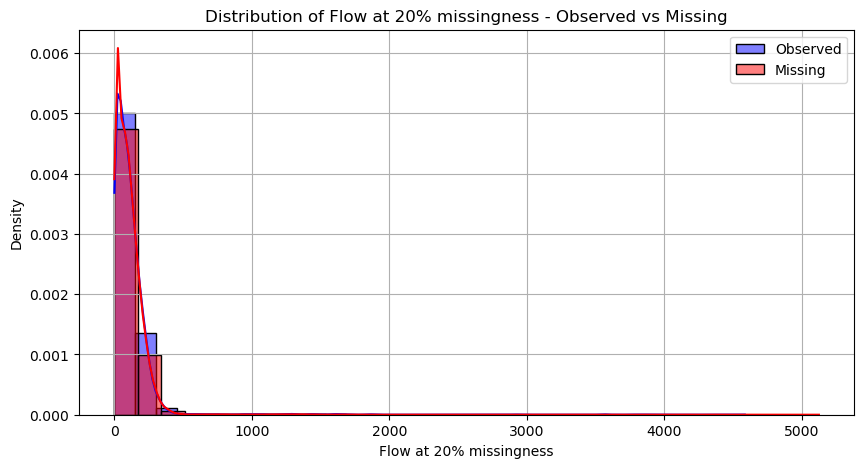

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled_seq_tensor[0].flatten(), val_masks_seq[0][90].flatten(), feature_name="Flow at 20% missingness")

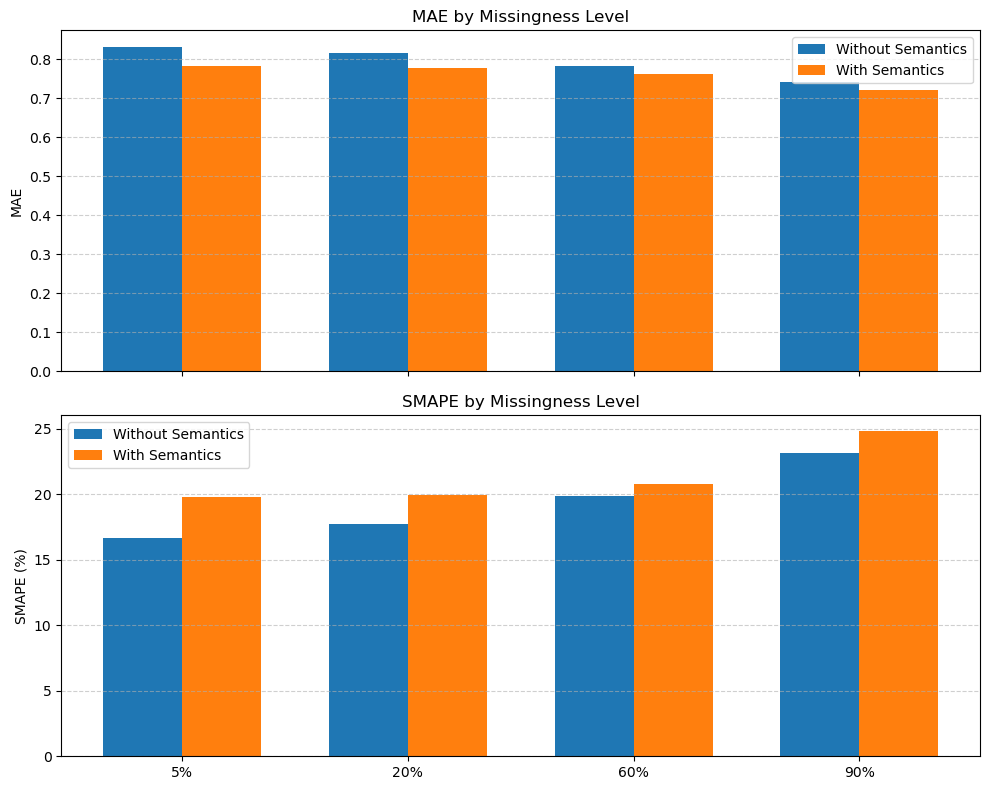

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Missingness levels
missing_levels = ['5%', '20%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
